In [87]:
%%time
import pandas as pd
import numpy as nm
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
color = sbn.color_palette()

Wall time: 5.48 ms


In [88]:
print(pd.__version__)
print(nm.__version__)
print(sbn.__version__)

1.3.4
1.20.3
0.11.2


In [89]:
ps_data = pd.read_csv('playstore-analysis.csv')
ps_data.shape

(10841, 13)

In [90]:
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [91]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [92]:
ps_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 1. Data clean up – Missing value treatment

a. Drop records where rating is missing since rating is our target/study variable

In [93]:
ps_data.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [94]:
# Checking shape of data after dropping null vallued columns

ps_data.shape

(9367, 13)

b. Check the null values for the Android Ver column.

In [95]:
ps_data.loc[ps_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


b)- i: Are all 3 records having the same problem?
 Ans:- Other features of 1st and 2nd data are kind of intuitive but the 3rd data seems to have wrong data present in its respective columns.

ii. Drop the 3rd record i.e. record for “Life Made WIFI …”


In [96]:
ps_data.drop([10472], inplace = True)

In [97]:
ps_data.loc[ps_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


iii. Replace remaining missing values with the mode

In [98]:
ps_data['Android Ver'].fillna(ps_data['Android Ver'].mode()[0], inplace=True)

ps_data.loc[ps_data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


 c. Current ver – replace with most common value

In [99]:
ps_data['Current Ver'].fillna(ps_data['Current Ver'].mode()[0], inplace=True)

# 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?
Ans: Reviews, Rating, Installs and Price Variables

b. Price variable – remove $ sign and convert to float

In [100]:
ps_data['Price'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
10834    <class 'str'>
10836    <class 'str'>
10837    <class 'str'>
10839    <class 'str'>
10840    <class 'str'>
Name: Price, Length: 9366, dtype: object

In [101]:
ps_data['Price'] = ps_data['Price'].str.replace(',','').str.replace('$','').astype('float')

C:\Users\MADHU\AppData\Local\Temp/ipykernel_10564/2278317989.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ps_data['Price'] = ps_data['Price'].str.replace(',','').str.replace('$','').astype('float')


In [102]:
ps_data['Price'].apply(type)

0        <class 'float'>
1        <class 'float'>
2        <class 'float'>
3        <class 'float'>
4        <class 'float'>
              ...       
10834    <class 'float'>
10836    <class 'float'>
10837    <class 'float'>
10839    <class 'float'>
10840    <class 'float'>
Name: Price, Length: 9366, dtype: object

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [103]:
ps_data['Installs'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
10834    <class 'str'>
10836    <class 'str'>
10837    <class 'str'>
10839    <class 'str'>
10840    <class 'str'>
Name: Installs, Length: 9366, dtype: object

In [104]:
ps_data['Installs'] = ps_data['Installs'].str.replace(',','').str.replace('+','').astype('int')

C:\Users\MADHU\AppData\Local\Temp/ipykernel_10564/2939183594.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ps_data['Installs'] = ps_data['Installs'].str.replace(',','').str.replace('+','').astype('int')


In [105]:
ps_data['Installs'].apply(type)

0        <class 'int'>
1        <class 'int'>
2        <class 'int'>
3        <class 'int'>
4        <class 'int'>
             ...      
10834    <class 'int'>
10836    <class 'int'>
10837    <class 'int'>
10839    <class 'int'>
10840    <class 'int'>
Name: Installs, Length: 9366, dtype: object

d. Convert all other identified columns to numeric

In [106]:
# Reviews column needs to be converted to numeric

ps_data['Reviews'] = ps_data['Reviews'].astype('int')

In [107]:
ps_data['Reviews'].apply(type)

0        <class 'int'>
1        <class 'int'>
2        <class 'int'>
3        <class 'int'>
4        <class 'int'>
             ...      
10834    <class 'int'>
10836    <class 'int'>
10837    <class 'int'>
10839    <class 'int'>
10840    <class 'int'>
Name: Reviews, Length: 9366, dtype: object

# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store.
i. Are there any such records? Drop if so.

In [108]:
ps_data.loc[ps_data.Rating < 1] & ps_data.loc[ps_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no such records where Rating is more than 5 or less than 1

b. Reviews should not be more than installs as only those who installed can review the 
app.
i. Are there any such records? Drop if so.

In [109]:
ps_data.loc[ps_data['Reviews'] > ps_data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Yes, there are seven rows with reviews more than installs

In [110]:
x = ps_data[ps_data['Reviews'] > ps_data['Installs']].index
ps_data.drop(labels=x, inplace=True)

In [111]:
ps_data.loc[ps_data['Reviews'] > ps_data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [112]:
ps_data.shape

(9359, 13)

# 4. Identify and handle outliers – 

# a. Price column

i. Make suitable plot to identify outliers in price

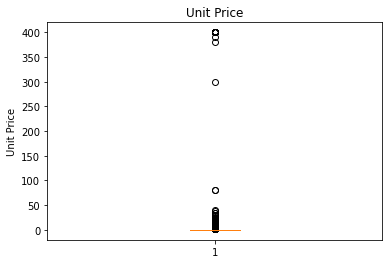

In [113]:
plt.boxplot(ps_data['Price'])
plt.ylabel('Unit Price')
plt.title('Unit Price')
plt.show()

ii. Do you expect apps on the play store to cost $200? Check out these cases

Ans:- Yes, Playstore can also accomodate such apps whose cost is $200 or More.

In [114]:
ps_data.loc[ps_data['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


iv. Limit data to records with price < $30

In [115]:
gt_30 = ps_data[ps_data['Price'] > 30].index
ps_data.drop(labels=gt_30, inplace=True)

In [116]:
gt_30

Int64Index([2253, 2301, 2365, 2402, 2414, 4197, 4362, 4367, 5351, 5354, 5355,
            5356, 5357, 5358, 5359, 5360, 5362, 5364, 5366, 5369, 5373],
           dtype='int64')

iii. After dropping the useless records, make the suitable plot again to identify 
outliers

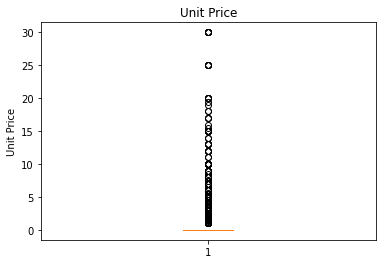

In [117]:
plt.boxplot(ps_data['Price'])
plt.ylabel('Unit Price')
plt.title('Unit Price')
plt.show()

# b. Reviews column

i. Make suitable plot

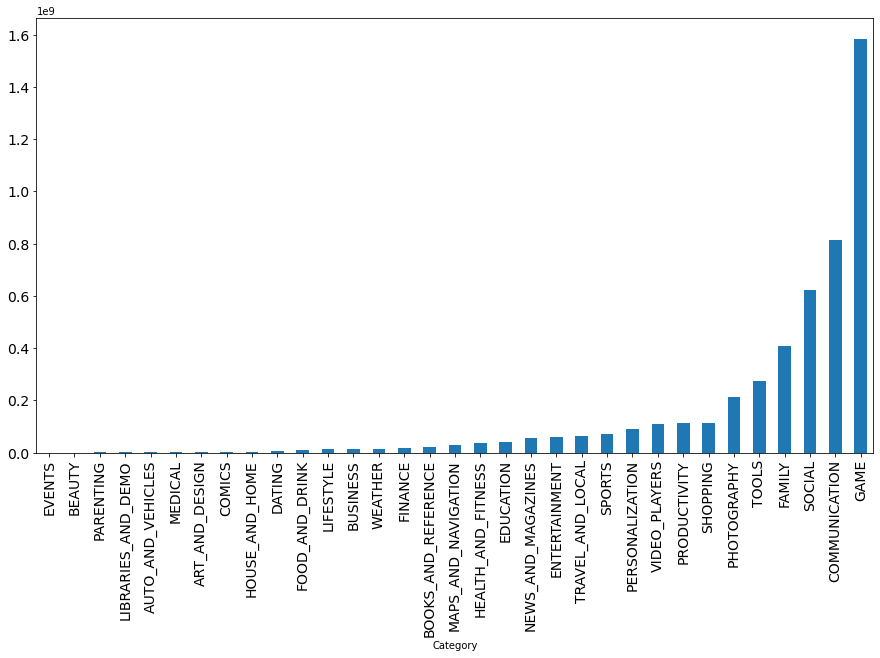

In [118]:
total=ps_data.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='bar', fontsize=14)
#print(total.sort_values(ascending=False))
plt.show()

ii. Limit data to apps with < 1 Million reviews

In [119]:
gt_1m = ps_data[ps_data['Reviews'] > 1000000 ].index
ps_data.drop(labels = gt_1m, inplace=True)
print(gt_1m.value_counts().sum(),'columns dropped')

704 columns dropped


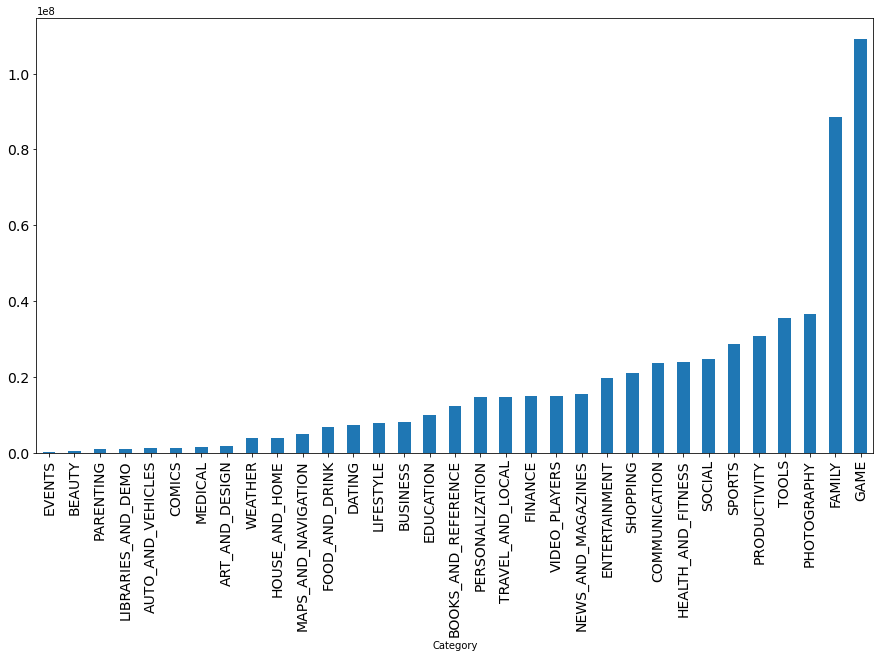

In [120]:
total=ps_data.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='bar', fontsize=14)
#print(total.sort_values(ascending=False))
plt.show()

# c. Installs

i. What is the 95th percentile of the installs?

In [121]:
percentile = ps_data.Installs.quantile(0.95)

percentile

10000000.0

ii. Drop records having a value more than the 95th percentile

In [122]:
ps_data.shape

(8634, 13)

In [123]:
#'columns dropped'

gt_95 = ps_data[ps_data["Installs"] > percentile].index
ps_data.drop(labels = gt_95, inplace = True)
print(gt_95.value_counts().sum())                    

199


In [124]:
ps_data.shape

(8435, 13)

# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

a. How do you explain this?

C:\Users\MADHU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


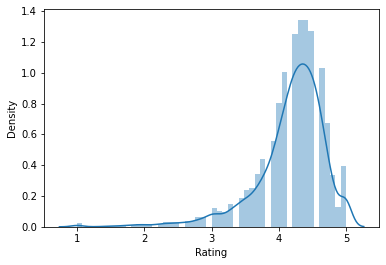

In [125]:
sbn.distplot(ps_data['Rating'])
plt.show()

b. What is the implication of this on your analysis?

In [126]:
print('The skewness of this distribution is:',ps_data['Rating'].skew())
print('The Median of this distribution is: {} which is greater than the mean: {} of this distribution'
      .format(ps_data.Rating.median(),ps_data.Rating.mean()))
print('The Mode of this distribution is:',ps_data.Rating.mode())

The skewness of this distribution is: -1.7434270330647985
The Median of this distribution is: 4.3 which is greater than the mean: 4.170800237107298 of this distribution
The Mode of this distribution is: 0    4.3
dtype: float64


# 6. What are the top Content Rating values?

a. Are there any values with very few records?

In [127]:
ps_data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Ans:- Adults only 18+ and Unrated are with very few records in Rating column. 

b. If yes, drop those as they won’t help in the analysis

In [128]:
#Replacing unwanted values with NaN

unwanted_cr = []
for k in ps_data['Content Rating']:
    unwanted_cr.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

ps_data['Content Rating']=unwanted_cr

In [129]:
# Droping the NaN values.

nan_rating = ps_data[ps_data["Content Rating"] == 'NaN'].index
ps_data.drop(labels = nan_rating, inplace=True)

In [130]:
ps_data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

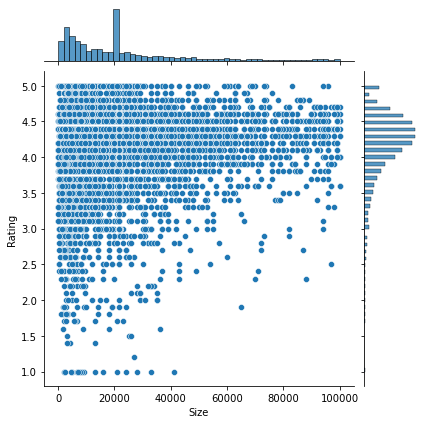

In [131]:
sbn.jointplot(x ='Size', y ='Rating', data = ps_data, kind ='scatter')
plt.show()

b. Do you see any patterns?

Ans:- Yes, size & rating are correlated.

c. How do you explain the pattern?

size & rating are +vely correlated

In [132]:
ps_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


# 8. Effect of price on rating

a. Make a jointplot (with regression line)

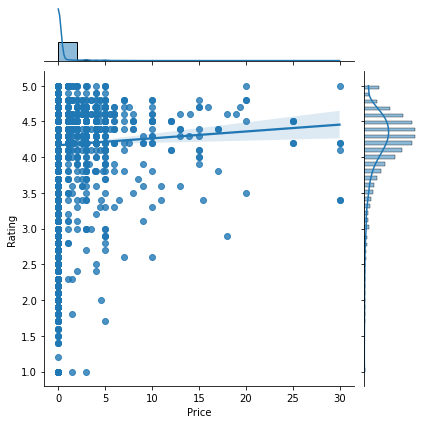

In [133]:
sbn.jointplot(x ='Price', y ='Rating', data = ps_data, kind ='reg')
plt.show()

b. What pattern do you see?

Ans:- Rating and price are +vely correlated but with very small amount ie; 0.031479

In [134]:
ps_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


c. How do you explain the pattern?

Ans:- On increase in price, rating seems to be flattered after 4, means Price and Rating are weakly correlated

d. Replot the data, this time with only records with price > 0

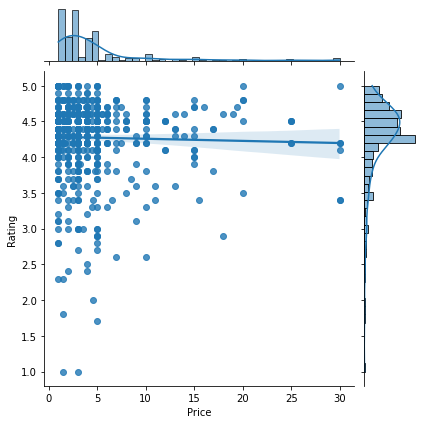

In [135]:
rtng0 = ps_data.loc[ps_data.Price>0]
sbn.jointplot(x='Price', y='Rating', data=rtng0, kind='reg')
plt.show()

e. Does the pattern change?

Ans:- Yes, now there is negative correlation between Price and Rating

f. What is your overall inference on the effect of price on the rating

Ans:- There is no such effect of price on rating once rating is above 4.

# 9. Look at all the numeric interactions together – 

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

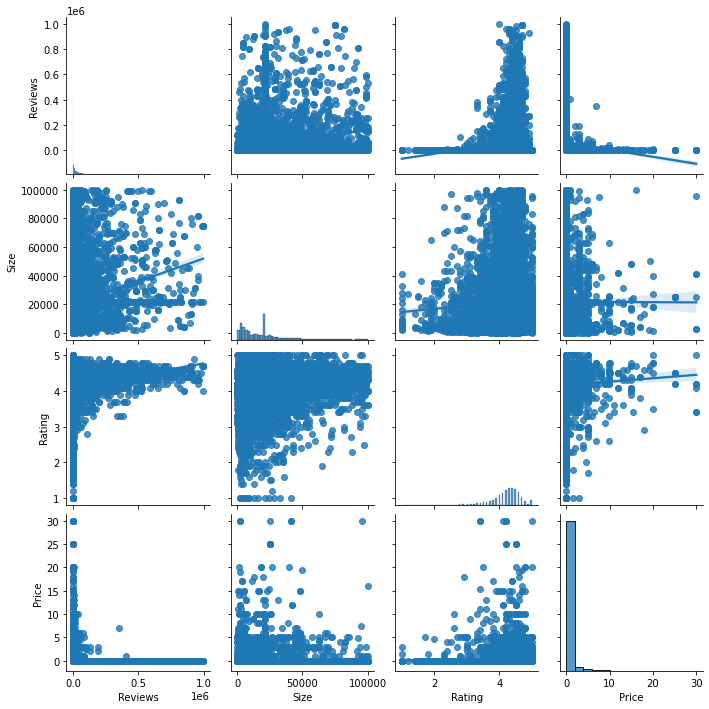

Wall time: 8.58 s


In [136]:
%%time
sbn.pairplot(ps_data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

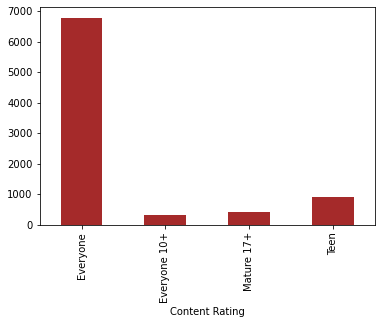

In [141]:
ps_data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="brown")
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

Ans:- Since content rating has outliers and median would be best suitable metric to use.

c. Choose the right metric and plot

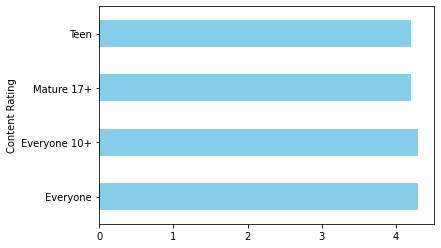

In [151]:
ps_data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="skyblue")
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

C:\Users\MADHU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


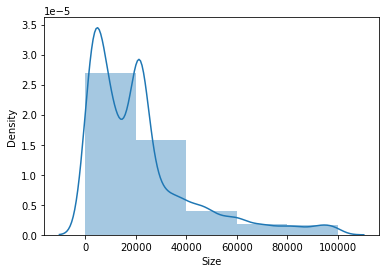

In [152]:
#Checking skewness of size

sbn.distplot(ps_data["Size"], bins=5)
plt.show()

In [155]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
ps_data['Size_Buckets'] = pd.cut(ps_data['Size'], bins, labels=['0-4.6k','4.6k-12k','12k-21.5k','21.5k-32k','32k-100k'])
pd.pivot_table(ps_data, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
0-4.6k,4.116465,4.188889,3.951429,4.216129
4.6k-12k,4.158147,4.207143,4.129592,4.208511
12k-21.5k,4.178139,4.300000,3.883582,4.123973
21.5k-32k,4.213706,4.199174,4.163333,4.170435
32k-100k,4.185690,4.215702,4.193814,4.244483


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

In [160]:
rating_20th = pd.pivot_table(ps_data, values='Rating', index='Size_Buckets', columns='Content Rating', 
                             aggfunc=lambda x:nm.quantile(x,0.2))
rating_20th

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
0-4.6k,3.8,3.84,3.28,3.84
4.6k-12k,3.8,3.94,3.64,3.80
12k-21.5k,3.9,4.16,3.50,3.90
21.5k-32k,4.0,4.00,3.98,3.90
32k-100k,3.9,4.00,4.00,4.00


c. Make a heatmap of this

i. Annotated

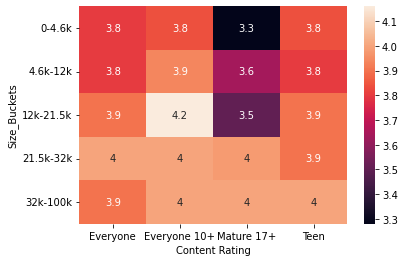

In [162]:
sbn.heatmap(rating_20th, annot = True)
plt.show()

ii. Greens color map

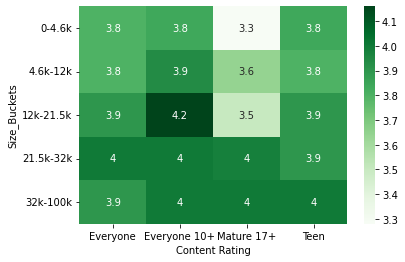

In [163]:
sbn.heatmap(rating_20th, annot=True, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Ans:- As far as preference is concern, we can see that Apps which are in size bucket of 21k and above are also with highest Ratings in all Categories. So, we can not conclude that lighter Apps are preferred in all Categories.